In [13]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline 

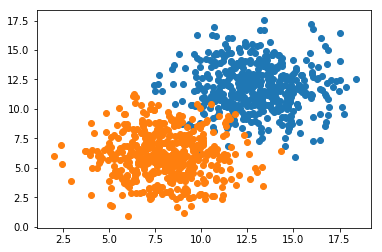

In [14]:
# create the data
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

# X: data
X = np.vstack((Xa, Xb)) 
# y: labels
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

# plot 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [27]:
# build the model
model = Sequential()
model.add(Dense(units=1,input_shape=(2,),activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam,loss='binary_crossentropy',metrics=['accuracy'])

# train the model
h = model.fit(x=X,y=y,verbose=1,batch_size=50,epochs=100,shuffle='true')

Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2.2628 - acc: 0.5480
Epoch 2/100
1000/1000 [==============================] - 0s 65us/step - loss: 0.5936 - acc: 0.6830
Epoch 3/100
1000/1000 [==============================] - 0s 73us/step - loss: 0.4371 - acc: 0.8130
Epoch 4/100
1000/1000 [==============================] - 0s 80us/step - loss: 0.3820 - acc: 0.8710
Epoch 5/100
1000/1000 [==============================] - 0s 81us/step - loss: 0.3448 - acc: 0.9060
Epoch 6/100
1000/1000 [==============================] - 0s 86us/step - loss: 0.3165 - acc: 0.9130
Epoch 7/100
1000/1000 [==============================] - 0s 73us/step - loss: 0.2934 - acc: 0.9290
Epoch 8/100
1000/1000 [==============================] - 0s 89us/step - loss: 0.2570 - acc: 0.9490
Epoch 9/100
1000/1000 [==============================] - 0s 81us/step - loss: 0.2392 - acc: 0.9570
Epoch 10/100
1000/1000 [==============================] - 0s 82us/step - loss: 0.2251 - acc: 0.9480
Epoch 11/1

Epoch 83/100
1000/1000 [==============================] - 0s 88us/step - loss: 0.0747 - acc: 0.9730
Epoch 84/100
1000/1000 [==============================] - 0s 75us/step - loss: 0.0704 - acc: 0.9740
Epoch 85/100
1000/1000 [==============================] - 0s 70us/step - loss: 0.0696 - acc: 0.9770
Epoch 86/100
1000/1000 [==============================] - 0s 60us/step - loss: 0.0684 - acc: 0.9770
Epoch 87/100
1000/1000 [==============================] - 0s 57us/step - loss: 0.0691 - acc: 0.9760
Epoch 88/100
1000/1000 [==============================] - 0s 69us/step - loss: 0.0651 - acc: 0.9790
Epoch 89/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.0712 - acc: 0.9750
Epoch 90/100
1000/1000 [==============================] - 0s 64us/step - loss: 0.0694 - acc: 0.9730
Epoch 91/100
1000/1000 [==============================] - 0s 67us/step - loss: 0.0754 - acc: 0.9730
Epoch 92/100
1000/1000 [==============================] - 0s 71us/step - loss: 0.0702 - acc: 0.9770


Text(0.5, 0, 'epoch')

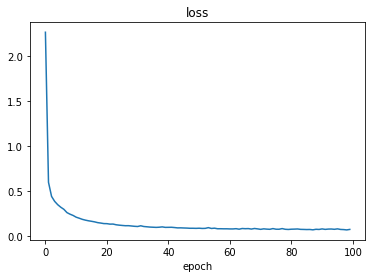

In [28]:
# plot
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [41]:
# decisive boundary layer
def plot_decision_boundary(X,y,model):
    # define a grid 
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span = np.linspace(min(X[:,1])-1,max(X[:,1])+1)
    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    
    # get the predictions for the points (consistent shape)
    pred = model.predict(grid).reshape(xx.shape)
    
    plt.contourf(xx,yy,pred)

pred:  [[0.9995266]]


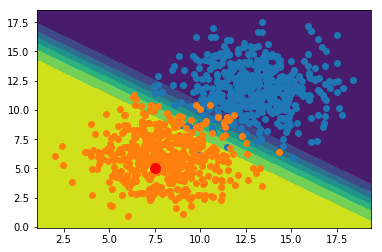

In [43]:
# probability the points will be 1 (yellow)
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

# testing
x,y = 7.5,5
point = np.array([[x,y]])
pred_2 = model.predict(point)
plt.plot([x],[y],marker="o",markersize=10,color="red")
print("pred: ",pred_2)